# Political TV Ads Visualizations

In [1]:
import pprint
import pickle
import pandas as pd
from datetime import datetime
import numpy as np
import string
from collections import Counter
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 2000)
# pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:,.2f}'.format # this is superior to precision - b/c no scientific notation

In [2]:
# Using 'fivethirtyeight' style sheet

plt.style.use('fivethirtyeight')

## Reading in cleaned up dataset for visualizations

- see `State_Daily_Ad_Counts_by_Party_7DMA` notebook for details on how data was cleaned

In [3]:
tv_ads = pd.read_pickle('data/political_tv_ads_cleaned_for_visuals.pickle')
tv_ads.head()

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,ad_length,day_of_week,metro_area,state,subject_count,hour_aired,sponsor_class,party
start_time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01 01:19:59,261456,6035,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",On the Record With Greta Van Susteren,news,2016-08-01 01:19:59,2016-08-01 01:21:04,PolAd_HillaryClinton_4drmd,https://archive.org/embed/PolAd_HillaryClinton...,Reform America Fund,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-09-21 10:40:12,65.00,Monday,San Francisco-Oakland-San Jose,National,1.00,1,R_PAC,R
2016-08-01 06:20:04,261450,6035,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",Fox News Sunday With Chris Wallace,news,2016-08-01 06:20:04,2016-08-01 06:21:09,PolAd_HillaryClinton_4drmd,https://archive.org/embed/PolAd_HillaryClinton...,Reform America Fund,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-09-21 10:40:12,65.00,Monday,San Francisco-Oakland-San Jose,National,1.00,6,R_PAC,R
2016-08-01 08:39:49,48222,4176,WCAU,"Philadelphia, PA",NBC10 News Today at 430am,news,2016-08-01 08:39:49,2016-08-01 08:40:21,PolAd_DonaldTrump_99k4w,https://archive.org/embed/PolAd_DonaldTrump_99k4w,Hillary for America,Multiple,PRES,"2,016.00","Candidate Biography, Foreign Policy, Nuclear, ...",Donald Trump,campaign,mixed,2016-09-12 14:51:51,32.00,Monday,Philadelphia,PA,4.00,8,Clinton,D
2016-08-01 08:48:14,48395,4176,KYW,"Philadelphia, PA",Eyewitness News at 430,news,2016-08-01 08:48:14,2016-08-01 08:48:46,PolAd_DonaldTrump_99k4w,https://archive.org/embed/PolAd_DonaldTrump_99k4w,Hillary for America,Multiple,PRES,"2,016.00","Candidate Biography, Foreign Policy, Nuclear, ...",Donald Trump,campaign,mixed,2016-09-12 14:51:51,32.00,Monday,Philadelphia,PA,4.00,8,Clinton,D
2016-08-01 09:09:45,378441,7459,MSNBCW,"San Francisco-Oakland-San Jose, CA",First Look,news,2016-08-01 09:09:45,2016-08-01 09:10:15,PolAd_HillaryClinton_4gvic,https://archive.org/embed/PolAd_HillaryClinton...,Make America Number One,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-10-21 10:40:01,30.00,Monday,San Francisco-Oakland-San Jose,National,1.00,9,R_PAC,R


## High-Level Visualizations

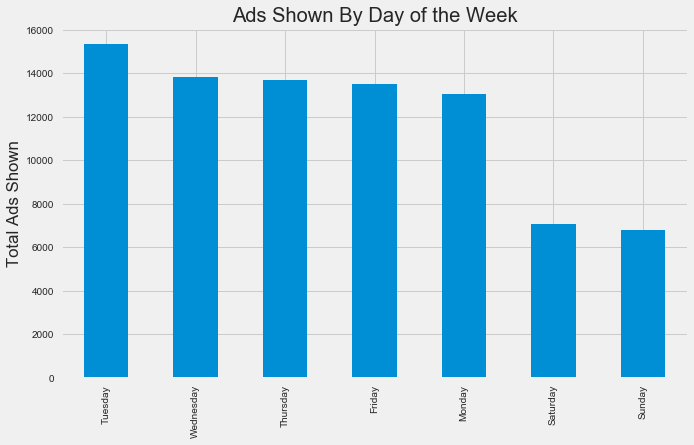

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
tv_ads['day_of_week'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Day of the Week")
plt.ylabel("Total Ads Shown")
#plt.savefig('nv_revised_pics/ads_by_dow.png')

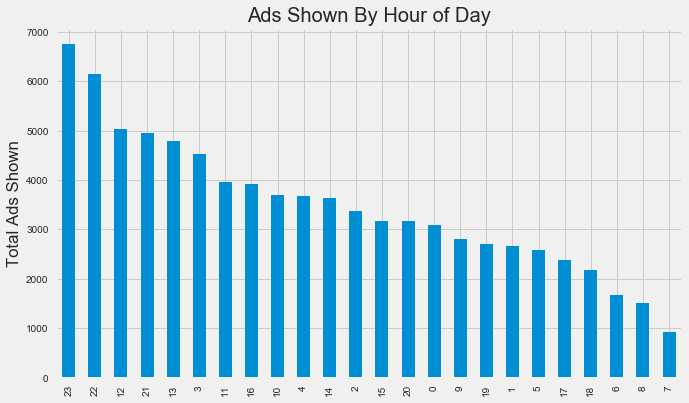

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
tv_ads['hour_aired'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Hour of Day")
plt.ylabel("Total Ads Shown")
#plt.savefig('nv_revised_pics/ads_by_hour.png')

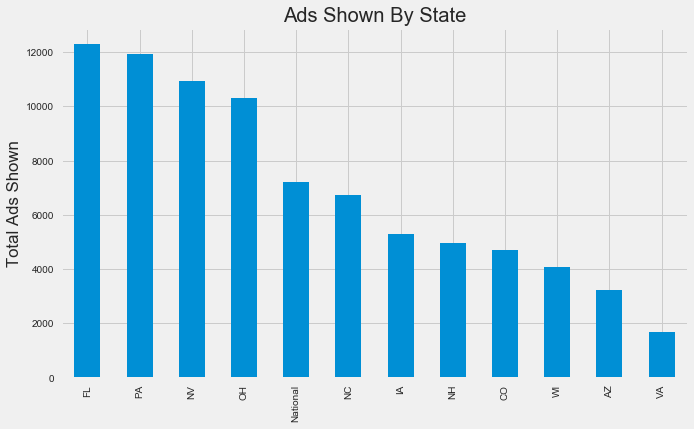

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
tv_ads['state'].value_counts().plot(kind='bar')
plt.title("Ads Shown By State")
plt.ylabel("Total Ads Shown")
#plt.savefig('nv_revised_pics/ads_by_state.png')

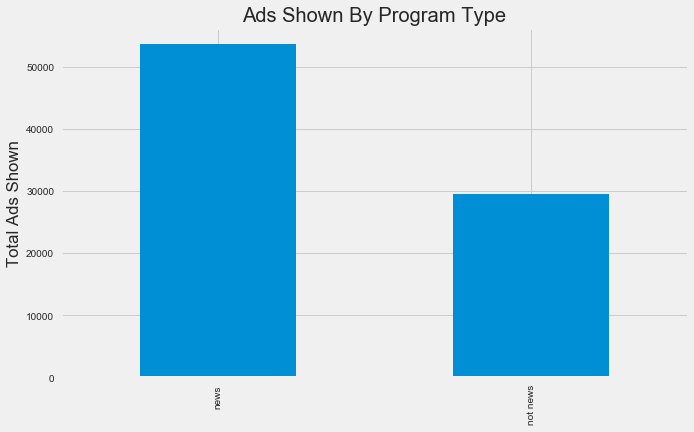

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
tv_ads['program_type'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Program Type")
plt.ylabel("Total Ads Shown")
#plt.savefig('nv_revised_pics/ads_by_program_type.png')

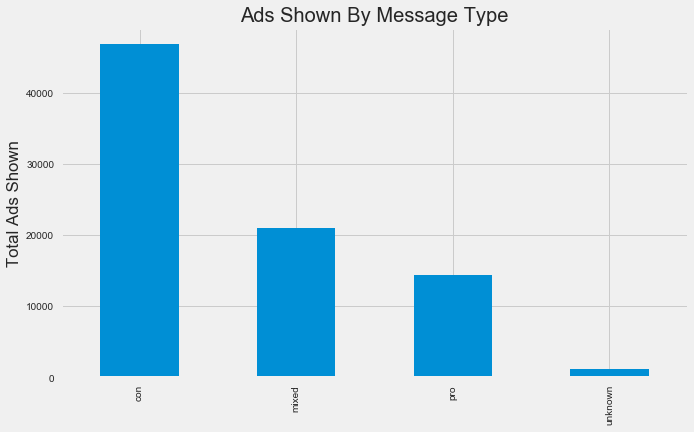

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
tv_ads['message'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Message Type")
plt.ylabel("Total Ads Shown")
#plt.savefig('nv_revised_pics/ads_by_message_type.png')

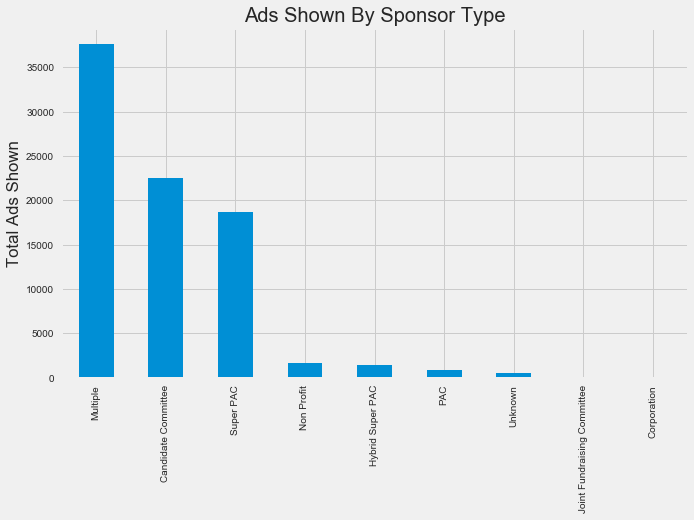

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
tv_ads['sponsor_types'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Sponsor Type")
plt.ylabel("Total Ads Shown")
#plt.savefig('nv_revised_pics/ads_by_sponsor_type.png')

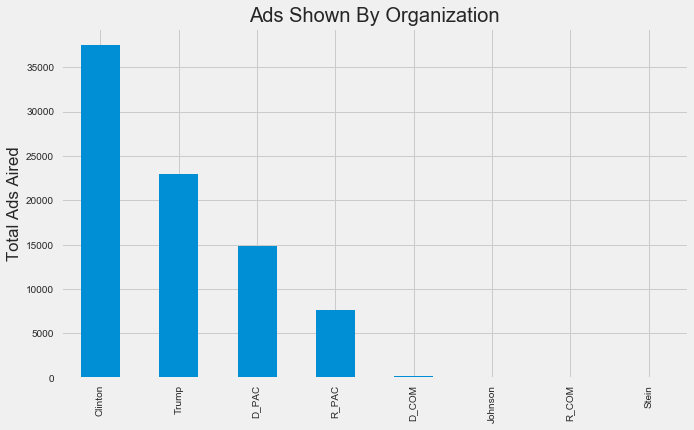

In [10]:
# plot of ads by organization
fig, ax = plt.subplots(figsize=(10, 6))
tv_ads['sponsor_class'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Organization")
plt.ylabel("Total Ads Aired")
#plt.savefig('nv_revised_pics/ads_aired_by_org.png')

# takeaway from this chart is how much greater volume Dems had on all fronts -- candidate committee/PAC/Party
# Johnson had more ads than ads for Trump sponsored by the RNC

## Generating Ad Subjects Visualization

In [11]:
# Creating a list of topics and then get a counter dictionary

# first convert to strings

tv_ads['split_subjects_tmp'] = tv_ads['subjects'].map(lambda x: str(x).split(','))
tv_ads.head(5)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,ad_length,day_of_week,metro_area,state,subject_count,hour_aired,sponsor_class,party,split_subjects_tmp
start_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01 01:19:59,261456,6035,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",On the Record With Greta Van Susteren,news,2016-08-01 01:19:59,2016-08-01 01:21:04,PolAd_HillaryClinton_4drmd,https://archive.org/embed/PolAd_HillaryClinton...,Reform America Fund,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-09-21 10:40:12,65.00,Monday,San Francisco-Oakland-San Jose,National,1.00,1,R_PAC,R,[Candidate Biography]
2016-08-01 06:20:04,261450,6035,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",Fox News Sunday With Chris Wallace,news,2016-08-01 06:20:04,2016-08-01 06:21:09,PolAd_HillaryClinton_4drmd,https://archive.org/embed/PolAd_HillaryClinton...,Reform America Fund,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-09-21 10:40:12,65.00,Monday,San Francisco-Oakland-San Jose,National,1.00,6,R_PAC,R,[Candidate Biography]
2016-08-01 08:39:49,48222,4176,WCAU,"Philadelphia, PA",NBC10 News Today at 430am,news,2016-08-01 08:39:49,2016-08-01 08:40:21,PolAd_DonaldTrump_99k4w,https://archive.org/embed/PolAd_DonaldTrump_99k4w,Hillary for America,Multiple,PRES,"2,016.00","Candidate Biography, Foreign Policy, Nuclear, ...",Donald Trump,campaign,mixed,2016-09-12 14:51:51,32.00,Monday,Philadelphia,PA,4.00,8,Clinton,D,"[Candidate Biography, Foreign Policy, Nuclea..."
2016-08-01 08:48:14,48395,4176,KYW,"Philadelphia, PA",Eyewitness News at 430,news,2016-08-01 08:48:14,2016-08-01 08:48:46,PolAd_DonaldTrump_99k4w,https://archive.org/embed/PolAd_DonaldTrump_99k4w,Hillary for America,Multiple,PRES,"2,016.00","Candidate Biography, Foreign Policy, Nuclear, ...",Donald Trump,campaign,mixed,2016-09-12 14:51:51,32.00,Monday,Philadelphia,PA,4.00,8,Clinton,D,"[Candidate Biography, Foreign Policy, Nuclea..."
2016-08-01 09:09:45,378441,7459,MSNBCW,"San Francisco-Oakland-San Jose, CA",First Look,news,2016-08-01 09:09:45,2016-08-01 09:10:15,PolAd_HillaryClinton_4gvic,https://archive.org/embed/PolAd_HillaryClinton...,Make America Number One,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-10-21 10:40:01,30.00,Monday,San Francisco-Oakland-San Jose,National,1.00,9,R_PAC,R,[Candidate Biography]


In [12]:
sub_list = tv_ads['split_subjects_tmp'].tolist()
sub_list[0:5]

[['Candidate Biography'],
 ['Candidate Biography'],
 ['Candidate Biography', ' Foreign Policy', ' Nuclear', ' Criminal Justice'],
 ['Candidate Biography', ' Foreign Policy', ' Nuclear', ' Criminal Justice'],
 ['Candidate Biography']]

In [13]:
# using '.lower()' and .strip()' to eliminate spaces before and after topic to make sure no missed duplicates

subject_list = []

for sub in sub_list:
    for s in sub:
        subject_list.append(s.lower().strip())

subject_list[0:20]

['candidate biography',
 'candidate biography',
 'candidate biography',
 'foreign policy',
 'nuclear',
 'criminal justice',
 'candidate biography',
 'foreign policy',
 'nuclear',
 'criminal justice',
 'candidate biography',
 'candidate biography',
 'foreign policy',
 'nuclear',
 'criminal justice',
 'candidate biography',
 'candidate biography',
 'candidate biography',
 'candidate biography',
 'foreign policy']

In [14]:
# converting 'subject_list' to a set to get 'unique_subjects'

unique_subjects = set(subject_list)
len(unique_subjects)

66

In [15]:
subject_count = Counter(subject_list)
subject_count

Counter({'abortion': 1369,
         'bankruptcy': 195,
         'bipartisanship': 7699,
         'campaign finance': 289,
         'canddate biography': 134,
         'candidate biography': 53463,
         'children': 20531,
         'china': 4127,
         'civil rights': 8491,
         'climate change': 477,
         'corporations': 1,
         'crime': 5058,
         'criminal justice': 2151,
         'debates': 105,
         'debt': 1579,
         'disability': 9018,
         'diversity': 110,
         'drugs': 6,
         'economy': 10743,
         'education': 2264,
         'election': 66,
         'elections': 168,
         'energy': 2353,
         'environment': 809,
         'ethics': 1,
         'families': 11630,
         'federal budget': 3259,
         'foreign policy': 19476,
         'gambling': 1,
         'gays and lesbians': 1825,
         'guns': 1700,
         'health care': 3113,
         'homeland security': 3614,
         'housing': 90,
         'immigration': 8

In [16]:
# sorting the counting dictionary

sorted(subject_count.items(), key=lambda x: x[1], reverse=True)

[('candidate biography', 53463),
 ('children', 20531),
 ('jobs', 20217),
 ('foreign policy', 19476),
 ('terrorism', 19214),
 ('military', 16640),
 ('women', 14684),
 ('taxes', 12263),
 ('families', 11630),
 ('economy', 10743),
 ('nuclear', 9511),
 ('disability', 9018),
 ('immigration', 8872),
 ('civil rights', 8491),
 ('veterans', 8124),
 ('bipartisanship', 7699),
 ('crime', 5058),
 ('china', 4127),
 ('trade', 4078),
 ('homeland security', 3614),
 ('islam', 3391),
 ('federal budget', 3259),
 ('workers', 3221),
 ('health care', 3113),
 ('legal issues', 2833),
 ('energy', 2353),
 ('education', 2264),
 ('criminal justice', 2151),
 ('iran', 1877),
 ('gays and lesbians', 1825),
 ('guns', 1700),
 ('debt', 1579),
 ('iraq', 1527),
 ('religion', 1488),
 ('income', 1480),
 ('abortion', 1369),
 ('social security', 1045),
 ('small business', 887),
 ('environment', 809),
 ('poverty', 612),
 ('nan', 586),
 ('supreme court', 506),
 ('climate change', 477),
 ('police', 393),
 ('campaign finance', 289)

In [17]:
# Converting counting dictionary to dataframe

subject_df = pd.DataFrame.from_dict(subject_count, orient='index')
subject_df.head()

,0
economy,10743
nuclear,9511
canddate biography,134
science,23
state budget,76


In [18]:
# renaming column and sorting the dataframe

subject_df.rename(columns={subject_df.columns[0]:'Count'}, inplace=True)
subject_df.sort_values('Count', ascending=False, inplace=True)
subject_df.head(10) # to get the Top 10 subjects mentioned

,Count
candidate biography,53463
children,20531
jobs,20217
foreign policy,19476
terrorism,19214
military,16640
women,14684
taxes,12263
families,11630
economy,10743


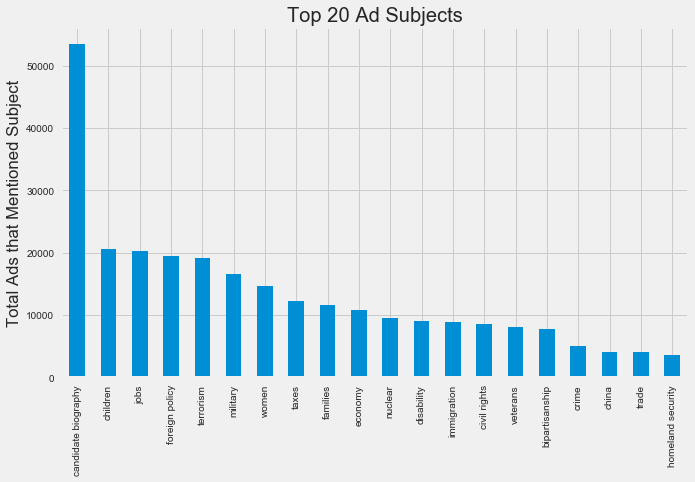

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
subject_df['Count'].head(20).plot(kind='bar')
plt.title("Top 20 Ad Subjects")
plt.ylabel("Total Ads that Mentioned Subject")
#plt.savefig('nv_revised_pics/top_20_ad_subjects.png')

# Interesting how far down the list Immigration and Trade are

In [20]:
# cleaning up DataFrame - removing temporary column used to generate subject_df

tv_ads.drop('split_subjects_tmp', inplace=True, axis=1)
tv_ads.head()

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,ad_length,day_of_week,metro_area,state,subject_count,hour_aired,sponsor_class,party
start_time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01 01:19:59,261456,6035,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",On the Record With Greta Van Susteren,news,2016-08-01 01:19:59,2016-08-01 01:21:04,PolAd_HillaryClinton_4drmd,https://archive.org/embed/PolAd_HillaryClinton...,Reform America Fund,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-09-21 10:40:12,65.00,Monday,San Francisco-Oakland-San Jose,National,1.00,1,R_PAC,R
2016-08-01 06:20:04,261450,6035,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",Fox News Sunday With Chris Wallace,news,2016-08-01 06:20:04,2016-08-01 06:21:09,PolAd_HillaryClinton_4drmd,https://archive.org/embed/PolAd_HillaryClinton...,Reform America Fund,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-09-21 10:40:12,65.00,Monday,San Francisco-Oakland-San Jose,National,1.00,6,R_PAC,R
2016-08-01 08:39:49,48222,4176,WCAU,"Philadelphia, PA",NBC10 News Today at 430am,news,2016-08-01 08:39:49,2016-08-01 08:40:21,PolAd_DonaldTrump_99k4w,https://archive.org/embed/PolAd_DonaldTrump_99k4w,Hillary for America,Multiple,PRES,"2,016.00","Candidate Biography, Foreign Policy, Nuclear, ...",Donald Trump,campaign,mixed,2016-09-12 14:51:51,32.00,Monday,Philadelphia,PA,4.00,8,Clinton,D
2016-08-01 08:48:14,48395,4176,KYW,"Philadelphia, PA",Eyewitness News at 430,news,2016-08-01 08:48:14,2016-08-01 08:48:46,PolAd_DonaldTrump_99k4w,https://archive.org/embed/PolAd_DonaldTrump_99k4w,Hillary for America,Multiple,PRES,"2,016.00","Candidate Biography, Foreign Policy, Nuclear, ...",Donald Trump,campaign,mixed,2016-09-12 14:51:51,32.00,Monday,Philadelphia,PA,4.00,8,Clinton,D
2016-08-01 09:09:45,378441,7459,MSNBCW,"San Francisco-Oakland-San Jose, CA",First Look,news,2016-08-01 09:09:45,2016-08-01 09:10:15,PolAd_HillaryClinton_4gvic,https://archive.org/embed/PolAd_HillaryClinton...,Make America Number One,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-10-21 10:40:01,30.00,Monday,San Francisco-Oakland-San Jose,National,1.00,9,R_PAC,R


## Visualizations Generated Using Groupbys

In [21]:
# Democratic Ad Mix by State

dem_ad_mix_by_state = tv_ads[tv_ads['party'] == 'D'].groupby(['state', 'message'])['id'].count().unstack()

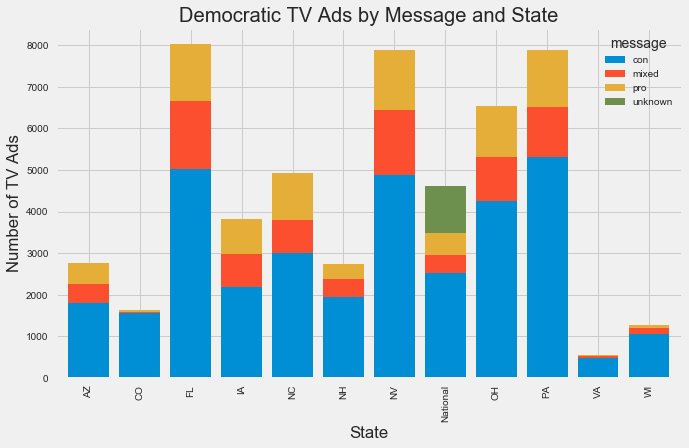

In [22]:
# Democratic Ad Mix by State - Stacked Bar Chart

fig, ax = plt.subplots(figsize=(10, 6))
ax = dem_ad_mix_by_state.plot.bar(ax=ax, width=0.8, stacked=True)
ax.set_ylabel('Number of TV Ads')
ax.set_xlabel('State')
ax.set_title('Democratic TV Ads by Message and State')
#plt.savefig('nv_revised_pics/dem_ads_by_message_and_state.png')

In [23]:
# Republican Ad Mix by State

rep_ad_mix_by_state = tv_ads[tv_ads['party'] == 'R'].groupby(['state', 'message'])['id'].count().unstack()

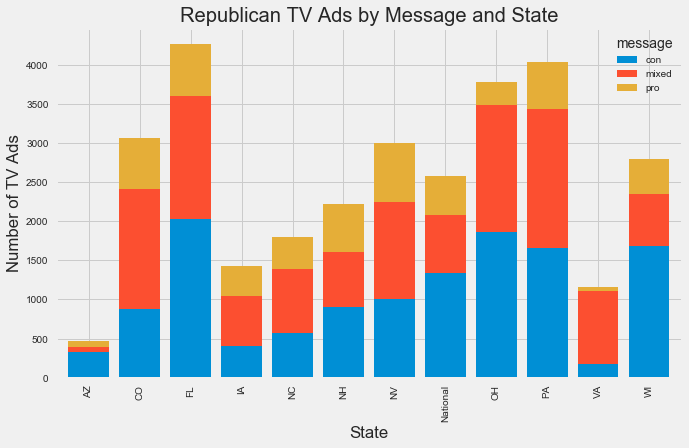

In [24]:
# Republican Ad Mix by State - Stacked Bar Chart

fig, ax = plt.subplots(figsize=(10, 6))
ax = rep_ad_mix_by_state.plot.bar(ax=ax, width=0.8, stacked=True)
ax.set_ylabel('Number of TV Ads')
ax.set_xlabel('State')
ax.set_title('Republican TV Ads by Message and State')
#plt.savefig('nv_revised_pics/rep_ads_by_message_and_state.png')

## Time Series Visualizations

### Democrat Time Series Charts

In [25]:
democrat_df = tv_ads.copy()[tv_ads['party'] == 'D']
democrat_df.head(2)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,ad_length,day_of_week,metro_area,state,subject_count,hour_aired,sponsor_class,party
start_time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01 08:39:49,48222,4176,WCAU,"Philadelphia, PA",NBC10 News Today at 430am,news,2016-08-01 08:39:49,2016-08-01 08:40:21,PolAd_DonaldTrump_99k4w,https://archive.org/embed/PolAd_DonaldTrump_99k4w,Hillary for America,Multiple,PRES,"2,016.00","Candidate Biography, Foreign Policy, Nuclear, ...",Donald Trump,campaign,mixed,2016-09-12 14:51:51,32.00,Monday,Philadelphia,PA,4.00,8,Clinton,D
2016-08-01 08:48:14,48395,4176,KYW,"Philadelphia, PA",Eyewitness News at 430,news,2016-08-01 08:48:14,2016-08-01 08:48:46,PolAd_DonaldTrump_99k4w,https://archive.org/embed/PolAd_DonaldTrump_99k4w,Hillary for America,Multiple,PRES,"2,016.00","Candidate Biography, Foreign Policy, Nuclear, ...",Donald Trump,campaign,mixed,2016-09-12 14:51:51,32.00,Monday,Philadelphia,PA,4.00,8,Clinton,D


In [26]:
# Creating sponsor mix series for charting - will combine in a single dataframe

clinton_com = democrat_df['id'][democrat_df['sponsor_class'] == 'Clinton'].resample('D').count()

dem_pac = democrat_df['id'][(democrat_df['sponsor_class'] == 'D_PAC') |
                            (democrat_df['sponsor_class'] == 'D_COM')].resample('D').count()

clinton_com_neg = democrat_df['id'][((democrat_df['message'] == 'con') &
                                     (democrat_df['sponsor_class'] == 'Clinton'))].resample('D').count()

dem_pac_neg = democrat_df['id'][((democrat_df['message'] == 'con') &
                                 ((democrat_df['sponsor_class'] == 'D_PAC') |
                                  (democrat_df['sponsor_class'] == 'D_COM')))].resample('D').count()

dem_pac_other = democrat_df['id'][((democrat_df['message'] != 'con') &
                                   ((democrat_df['sponsor_class'] == 'D_PAC') |
                                    (democrat_df['sponsor_class'] == 'D_COM')))].resample('D').count()

In [27]:
# Creating ad mix series for charting - will combine in a single dataframe

dem_con = democrat_df['id'][democrat_df['message'] == 'con'].resample('D').count()
dem_pro = democrat_df['id'][democrat_df['message'] == 'pro'].resample('D').count()
dem_mixed = democrat_df['id'][democrat_df['message'] == 'mixed'].resample('D').count()
dem_unknown = democrat_df['id'][democrat_df['message'] == 'unknown'].resample('D').count()

In [28]:
dem_ts_list = [clinton_com, dem_pac, 
               clinton_com_neg, dem_pac_neg, dem_pac_other, 
               dem_con, dem_pro, dem_mixed, dem_unknown]

dem_ts_cols = ['clinton_com', 'dem_pac', 
               'clinton_com_neg', 'dem_pac_neg', 'dem_pac_other',
               'dem_con', 'dem_pro', 'dem_mixed', 'dem_unknown']

In [29]:
dem_ts_df = pd.concat(dem_ts_list, axis=1, join='outer')
dem_ts_df.columns = dem_ts_cols
dem_ts_df.head(10)

,clinton_com,dem_pac,clinton_com_neg,dem_pac_neg,dem_pac_other,dem_con,dem_pro,dem_mixed,dem_unknown
start_time,,,,,,,,,
2016-08-01,19,3,nan,1,2,1,nan,19,2
2016-08-02,34,47,nan,42,5,42,nan,34,5
2016-08-03,35,67,nan,60,7,60,nan,35,7
2016-08-04,15,48,nan,43,5,43,nan,15,5
2016-08-05,8,69,2.00,63,6,65,2.00,4,6
2016-08-06,44,56,20.00,54,2,74,23.00,1,2
2016-08-07,2,37,1.00,37,0,38,1.00,0,0
2016-08-08,97,149,43.00,147,2,190,54.00,0,2
2016-08-09,203,163,104.00,154,9,258,105.00,0,3


In [30]:
dem_ts_df.shape

(100, 9)

In [31]:
dem_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2016-08-01 to 2016-11-08
Freq: D
Data columns (total 9 columns):
clinton_com        100 non-null int64
dem_pac            100 non-null int64
clinton_com_neg    96 non-null float64
dem_pac_neg        100 non-null int64
dem_pac_other      100 non-null int64
dem_con            100 non-null int64
dem_pro            96 non-null float64
dem_mixed          100 non-null int64
dem_unknown        100 non-null int64
dtypes: float64(2), int64(7)
memory usage: 7.8 KB


In [32]:
dem_pro[0:10]

start_time
2016-08-05      2
2016-08-06     23
2016-08-07      1
2016-08-08     54
2016-08-09    105
2016-08-10     89
2016-08-11    107
2016-08-12     92
2016-08-13     47
2016-08-14     66
Freq: D, Name: id, dtype: int64

In [33]:
dem_con[0:10]

start_time
2016-08-01      1
2016-08-02     42
2016-08-03     60
2016-08-04     43
2016-08-05     65
2016-08-06     74
2016-08-07     38
2016-08-08    190
2016-08-09    258
2016-08-10    318
Freq: D, Name: id, dtype: int64

In [34]:
# See that NaN's will arise because 'dem_pro' begins later than 'dem_con' -- no values from 'dem_pro' prior to
# '2016-08-05' -- that is why have to put into dataframe to harmonize all dates and then .fillna(0)

In [35]:
# first replace NaN's with zeros -- need to do it inplace or it won't work when you call the dataframe again below

dem_ts_df.fillna(0, inplace=True)

In [36]:
# Creating columns additional columns to calculate percentage mix for stacked bar charts

dem_ts_df['dem_total'] = (dem_ts_df['dem_con'] + 
                          dem_ts_df['dem_pro'] + 
                          dem_ts_df['dem_mixed'] + 
                          dem_ts_df['dem_unknown'])

dem_ts_df['dem_total_sponsor'] = dem_ts_df['clinton_com'] + dem_ts_df['dem_pac']

dem_ts_df['total_check'] = (dem_ts_df['dem_total'] - dem_ts_df['dem_total_sponsor'])

dem_ts_df.head()

,clinton_com,dem_pac,clinton_com_neg,dem_pac_neg,dem_pac_other,dem_con,dem_pro,dem_mixed,dem_unknown,dem_total,dem_total_sponsor,total_check
start_time,,,,,,,,,,,,
2016-08-01,19,3,0.00,1,2,1,0.00,19,2,22.00,22,0.00
2016-08-02,34,47,0.00,42,5,42,0.00,34,5,81.00,81,0.00
2016-08-03,35,67,0.00,60,7,60,0.00,35,7,102.00,102,0.00
2016-08-04,15,48,0.00,43,5,43,0.00,15,5,63.00,63,0.00
2016-08-05,8,69,2.00,63,6,65,2.00,4,6,77.00,77,0.00


In [37]:
dem_ts_df.info() # should have no nulls

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2016-08-01 to 2016-11-08
Freq: D
Data columns (total 12 columns):
clinton_com          100 non-null int64
dem_pac              100 non-null int64
clinton_com_neg      100 non-null float64
dem_pac_neg          100 non-null int64
dem_pac_other        100 non-null int64
dem_con              100 non-null int64
dem_pro              100 non-null float64
dem_mixed            100 non-null int64
dem_unknown          100 non-null int64
dem_total            100 non-null float64
dem_total_sponsor    100 non-null int64
total_check          100 non-null float64
dtypes: float64(4), int64(8)
memory usage: 10.2 KB


In [38]:
# checking to see if total column is correct - this should be 0.0

dem_ts_df['total_check'].sum()

0.0

In [39]:
# Now we can create pct columns for stacked bar charts

dem_ts_df['clinton_com_pct'] = (dem_ts_df['clinton_com'] / dem_ts_df['dem_total']) * 100
dem_ts_df['dem_pac_pct'] = (dem_ts_df['dem_pac'] / dem_ts_df['dem_total']) * 100

dem_ts_df['dem_con_pct'] = (dem_ts_df['dem_con'] / dem_ts_df['dem_total']) * 100
dem_ts_df['dem_pro_pct'] = (dem_ts_df['dem_pro'] / dem_ts_df['dem_total']) * 100
dem_ts_df['dem_mixed_pct'] = (dem_ts_df['dem_mixed'] / dem_ts_df['dem_total']) * 100
dem_ts_df['dem_unknown_pct'] = (dem_ts_df['dem_unknown'] / dem_ts_df['dem_total']) * 100

dem_ts_df['dem_pac_neg_pct'] = (dem_ts_df['dem_pac_neg'] / dem_ts_df['dem_con']) * 100
dem_ts_df['clinton_com_neg_pct'] = (dem_ts_df['clinton_com_neg'] / dem_ts_df['dem_con']) * 100

dem_ts_df['dem_pac_neg_mix'] = (dem_ts_df['dem_pac_neg'] / dem_ts_df['dem_pac']) * 100
dem_ts_df['dem_pac_other_mix'] = (dem_ts_df['dem_pac_other'] / dem_ts_df['dem_pac']) * 100

dem_ts_df.head()

,clinton_com,dem_pac,clinton_com_neg,dem_pac_neg,dem_pac_other,dem_con,dem_pro,dem_mixed,dem_unknown,dem_total,dem_total_sponsor,total_check,clinton_com_pct,dem_pac_pct,dem_con_pct,dem_pro_pct,dem_mixed_pct,dem_unknown_pct,dem_pac_neg_pct,clinton_com_neg_pct,dem_pac_neg_mix,dem_pac_other_mix
start_time,,,,,,,,,,,,,,,,,,,,,,
2016-08-01,19,3,0.00,1,2,1,0.00,19,2,22.00,22,0.00,86.36,13.64,4.55,0.00,86.36,9.09,100.00,0.00,33.33,66.67
2016-08-02,34,47,0.00,42,5,42,0.00,34,5,81.00,81,0.00,41.98,58.02,51.85,0.00,41.98,6.17,100.00,0.00,89.36,10.64
2016-08-03,35,67,0.00,60,7,60,0.00,35,7,102.00,102,0.00,34.31,65.69,58.82,0.00,34.31,6.86,100.00,0.00,89.55,10.45
2016-08-04,15,48,0.00,43,5,43,0.00,15,5,63.00,63,0.00,23.81,76.19,68.25,0.00,23.81,7.94,100.00,0.00,89.58,10.42
2016-08-05,8,69,2.00,63,6,65,2.00,4,6,77.00,77,0.00,10.39,89.61,84.42,2.60,5.19,7.79,96.92,3.08,91.30,8.70


In [40]:
# checking for NaN's after pct calculations -- cannot divide by zero

dem_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2016-08-01 to 2016-11-08
Freq: D
Data columns (total 22 columns):
clinton_com            100 non-null int64
dem_pac                100 non-null int64
clinton_com_neg        100 non-null float64
dem_pac_neg            100 non-null int64
dem_pac_other          100 non-null int64
dem_con                100 non-null int64
dem_pro                100 non-null float64
dem_mixed              100 non-null int64
dem_unknown            100 non-null int64
dem_total              100 non-null float64
dem_total_sponsor      100 non-null int64
total_check            100 non-null float64
clinton_com_pct        100 non-null float64
dem_pac_pct            100 non-null float64
dem_con_pct            100 non-null float64
dem_pro_pct            100 non-null float64
dem_mixed_pct          100 non-null float64
dem_unknown_pct        100 non-null float64
dem_pac_neg_pct        100 non-null float64
clinton_com_neg_pct    100 non-null float64
dem_

In [41]:
# checking for any non-sensical numbers for pct columns - should be none > 100 and < 0

dem_ts_df.describe()

,clinton_com,dem_pac,clinton_com_neg,dem_pac_neg,dem_pac_other,dem_con,dem_pro,dem_mixed,dem_unknown,dem_total,dem_total_sponsor,total_check,clinton_com_pct,dem_pac_pct,dem_con_pct,dem_pro_pct,dem_mixed_pct,dem_unknown_pct,dem_pac_neg_pct,clinton_com_neg_pct,dem_pac_neg_mix,dem_pac_other_mix
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,375.55,150.76,205.86,134.30,16.46,340.16,88.82,86.00,11.33,526.31,526.31,0.00,68.76,31.24,62.67,19.52,15.29,2.51,45.48,54.52,86.99,13.01
std,287.75,104.32,249.55,95.72,17.23,306.18,67.65,141.34,13.21,350.11,350.11,0.00,17.88,17.88,18.61,12.77,19.89,2.93,22.83,22.83,17.31,17.31
min,2.00,3.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,22.00,22.00,0.00,5.13,3.05,4.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,181.00,69.75,69.75,59.75,1.00,140.50,23.00,2.00,0.00,270.25,270.25,0.00,56.13,18.08,58.76,5.19,0.51,0.00,28.97,41.21,82.42,0.63
50%,327.00,136.00,130.00,109.50,11.00,259.50,83.50,15.50,6.00,435.00,435.00,0.00,71.42,28.58,66.82,23.55,3.40,1.12,42.31,57.69,91.63,8.37
75%,474.50,222.00,226.00,222.00,30.00,464.25,134.50,122.75,18.25,728.50,728.50,0.00,81.92,43.87,73.64,29.67,23.95,4.90,58.79,71.03,99.37,17.58
max,"1,500.00",400.00,"1,488.00",357.00,70.00,"1,785.00",249.00,566.00,47.00,"1,831.00","1,831.00",0.00,96.95,94.87,97.49,45.95,86.36,13.45,100.00,100.00,100.00,100.00


### Last step is to smooth data by calculating the 7DMA for Democrats

In [42]:
# use the 'min_periods=1' parameter to help resolve issue where there is one NaN in a 7 day period
# prevents the rolling period = NaN assuming you do not have 7 NaN's consecutively - not needed here, but needed later

dem_7DMA_tmp = dem_ts_df.rolling(7, min_periods=1).mean()
dem_7DMA_tmp.head(20)

,clinton_com,dem_pac,clinton_com_neg,dem_pac_neg,dem_pac_other,dem_con,dem_pro,dem_mixed,dem_unknown,dem_total,dem_total_sponsor,total_check,clinton_com_pct,dem_pac_pct,dem_con_pct,dem_pro_pct,dem_mixed_pct,dem_unknown_pct,dem_pac_neg_pct,clinton_com_neg_pct,dem_pac_neg_mix,dem_pac_other_mix
start_time,,,,,,,,,,,,,,,,,,,,,,
2016-08-01,19.00,3.00,0.00,1.00,2.00,1.00,0.00,19.00,2.00,22.00,22.00,0.00,86.36,13.64,4.55,0.00,86.36,9.09,100.00,0.00,33.33,66.67
2016-08-02,26.50,25.00,0.00,21.50,3.50,21.50,0.00,26.50,3.50,51.50,51.50,0.00,64.17,35.83,28.20,0.00,64.17,7.63,100.00,0.00,61.35,38.65
2016-08-03,29.33,39.00,0.00,34.33,4.67,34.33,0.00,29.33,4.67,68.33,68.33,0.00,54.22,45.78,38.41,0.00,54.22,7.38,100.00,0.00,70.75,29.25
2016-08-04,25.75,41.25,0.00,36.50,4.75,36.50,0.00,25.75,4.75,67.00,67.00,0.00,46.62,53.38,45.87,0.00,46.62,7.52,100.00,0.00,75.46,24.54
2016-08-05,22.20,46.80,0.40,41.80,5.00,42.20,0.40,21.40,5.00,69.00,69.00,0.00,39.37,60.63,53.58,0.52,38.33,7.57,99.38,0.62,78.63,21.37
2016-08-06,25.83,48.33,3.67,43.83,4.50,47.50,4.17,18.00,4.50,74.17,74.17,0.00,40.14,59.86,56.98,4.27,32.11,6.64,94.98,5.02,81.59,18.41
2016-08-07,22.43,46.71,3.29,42.86,3.86,46.14,3.71,15.43,3.86,69.14,69.14,0.00,35.14,64.86,62.76,4.02,27.52,5.69,95.32,4.68,84.22,15.78
2016-08-08,33.57,67.57,9.43,63.71,3.86,73.14,11.43,12.71,3.86,101.14,101.14,0.00,28.44,71.56,73.15,7.16,15.18,4.51,92.09,7.91,93.56,6.44
2016-08-09,57.71,84.14,24.29,79.71,4.43,104.00,26.43,7.86,3.57,141.86,141.86,0.00,30.36,69.64,75.81,11.26,9.19,3.75,86.33,13.67,94.29,5.71


In [43]:
# we want to plot the data from 8-14-16 onwards

dem_7DMA = dem_7DMA_tmp['2016-08-14':]
dem_7DMA.head()

,clinton_com,dem_pac,clinton_com_neg,dem_pac_neg,dem_pac_other,dem_con,dem_pro,dem_mixed,dem_unknown,dem_total,dem_total_sponsor,total_check,clinton_com_pct,dem_pac_pct,dem_con_pct,dem_pro_pct,dem_mixed_pct,dem_unknown_pct,dem_pac_neg_pct,clinton_com_neg_pct,dem_pac_neg_mix,dem_pac_other_mix
start_time,,,,,,,,,,,,,,,,,,,,,,
2016-08-14,153.43,152.43,73.86,147.14,5.29,221.00,80.00,0.57,4.29,305.86,305.86,0.00,50.34,49.66,72.17,26.16,0.16,1.51,66.07,33.93,96.27,3.73
2016-08-15,168.86,156.43,81.29,151.29,5.14,232.57,87.71,0.86,4.14,325.29,325.29,0.00,52.37,47.63,71.27,27.06,0.24,1.43,64.29,35.71,96.38,3.62
2016-08-16,171.57,140.14,83.57,136.29,3.86,219.86,87.29,0.86,3.71,311.71,311.71,0.00,56.15,43.85,70.11,28.34,0.24,1.32,59.91,40.09,97.17,2.83
2016-08-17,170.71,107.29,86.29,104.14,3.14,190.43,84.00,0.71,2.86,278.00,278.00,0.00,63.49,36.51,68.12,30.56,0.20,1.11,50.79,49.21,96.42,3.58
2016-08-18,167.14,84.14,86.14,81.57,2.57,167.71,80.29,1.00,2.29,251.29,251.29,0.00,69.12,30.88,65.96,32.69,0.39,0.96,43.42,56.58,96.74,3.26


### Now we can plot time series of Democrats stacked bar charts

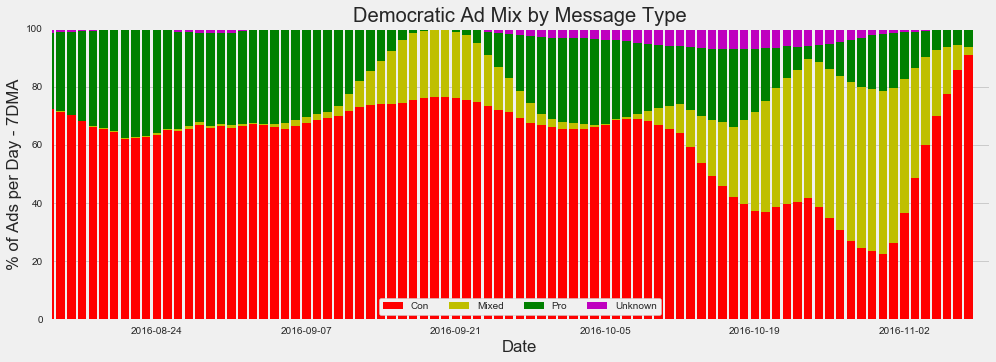

In [44]:
# Democratic % Ad Mix

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(dem_7DMA.index, # all bars have to have the same start data
       dem_7DMA['dem_con_pct'].values,
       color='r', 
       label='Con')

ax.bar(dem_7DMA.index,
       dem_7DMA['dem_mixed_pct'].values,
       color='y',
       bottom=dem_7DMA['dem_con_pct'].values,
       label='Mixed')

ax.bar(dem_7DMA.index,
       dem_7DMA['dem_pro_pct'].values,
       color='g',
       bottom=dem_7DMA['dem_con_pct'].values + dem_7DMA['dem_mixed_pct'].values,
       label='Pro')

ax.bar(dem_7DMA.index,
       dem_7DMA['dem_unknown_pct'].values,
       color='m',
       bottom=dem_7DMA['dem_con_pct'].values + dem_7DMA['dem_mixed_pct'].values + dem_7DMA['dem_pro_pct'].values,
       label='Unknown')

ax.set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax.legend(frameon=True, framealpha= 1, loc='lower center', ncol=4) 
# look at doc string, has the legend location codes
# framealpha=1 - makes legend solid (and brought forward), if do not put in it is transparent
ax.set(xlabel='Date', 
       ylabel='% of Ads per Day - 7DMA', 
       title='Democratic Ad Mix by Message Type')

#plt.savefig('nv_revised_pics/dem_ads_by_message_type_pct.png')

In [45]:
# Summary stats for above chart

dem_7DMA[['dem_con_pct', 'dem_mixed_pct', 'dem_pro_pct', 'dem_unknown_pct']].describe()

,dem_con_pct,dem_mixed_pct,dem_pro_pct,dem_unknown_pct
count,87.00,87.00,87.00,87.00
mean,61.38,15.31,20.95,2.37
std,15.17,17.70,10.83,2.46
min,22.59,0.16,0.72,0.00
25%,59.59,0.83,11.66,0.05
50%,66.02,7.84,22.98,1.43
75%,69.97,22.92,29.96,4.09
max,90.72,55.83,37.70,7.19


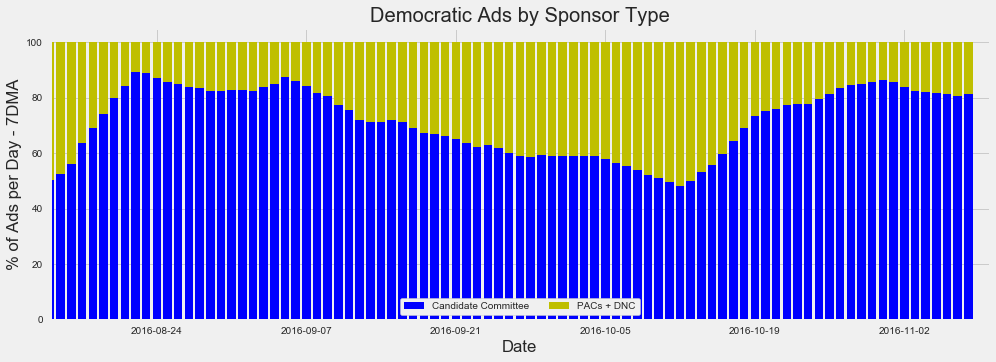

In [46]:
# Democratic % Sponsor Mix

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(dem_7DMA.index, # all bars have to have the same start data
       dem_7DMA['clinton_com_pct'].values,
       color='b', 
       label='Candidate Committee')

ax.bar(dem_7DMA.index,
       dem_7DMA['dem_pac_pct'].values,
       color='y',
       bottom=dem_7DMA['clinton_com_pct'].values,
       label='PACs + DNC')

ax.set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax.legend(frameon=True, framealpha= 1, loc='lower center', ncol=4) 
# look at doc string, has the legend location codes
# framealpha=1 - makes legend solid (and brought forward), if do not put in it is transparent
ax.set(xlabel='Date', 
       ylabel='% of Ads per Day - 7DMA', 
       title='Democratic Ads by Sponsor Type')

#plt.savefig('nv_revised_pics/dem_ads_by_sponsor_type.png')

In [47]:
# Summary stats for above chart

dem_7DMA[['clinton_com_pct', 'dem_pac_pct']].describe()

,clinton_com_pct,dem_pac_pct
count,87.00,87.00
mean,71.73,28.27
std,12.16,12.16
min,48.31,10.95
25%,59.60,17.44
50%,74.01,25.99
75%,82.56,40.40
max,89.05,51.69


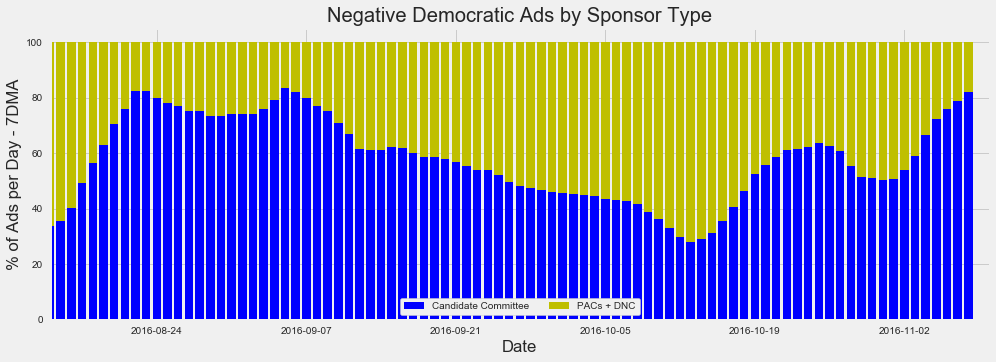

In [48]:
# Democratic Negative Ads by Sponsor Type

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(dem_7DMA.index, # all bars have to have the same start data
       dem_7DMA['clinton_com_neg_pct'].values,
       color='b', 
       label='Candidate Committee')

ax.bar(dem_7DMA.index,
       dem_7DMA['dem_pac_neg_pct'].values,
       color='y',
       bottom=dem_7DMA['clinton_com_neg_pct'].values,
       label='PACs + DNC')

ax.set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax.legend(frameon=True, framealpha= 1, loc='lower center', ncol=4) 
# look at doc string, has the legend location codes
# framealpha=1 - makes legend solid (and brought forward), if do not put in it is transparent
ax.set(xlabel='Date', 
       ylabel='% of Ads per Day - 7DMA', 
       title='Negative Democratic Ads by Sponsor Type')

#plt.savefig('nv_revised_pics/dem_neg_ads_by_sponsor_type.png')

In [49]:
# Summary stats for above chart

dem_7DMA[['clinton_com_neg_pct', 'dem_pac_neg_pct']].describe()

,clinton_com_neg_pct,dem_pac_neg_pct
count,87.00,87.00
mean,58.33,41.67
std,15.07,15.07
min,28.16,16.55
25%,46.60,26.54
50%,58.60,41.40
75%,73.46,53.40
max,83.45,71.84


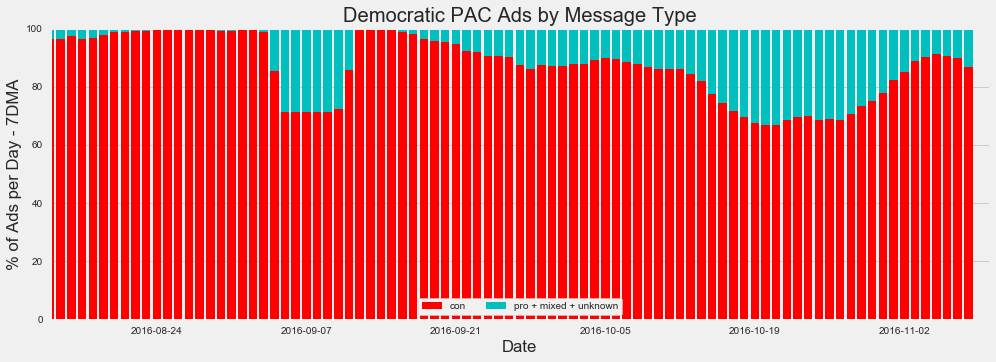

In [50]:
# Democratic PAC Ads by Message

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(dem_7DMA.index, # all bars have to have the same start data
       dem_7DMA['dem_pac_neg_mix'].values,
       color='r', 
       label='con')

ax.bar(dem_7DMA.index,
       dem_7DMA['dem_pac_other_mix'].values,
       color='c',
       bottom=dem_7DMA['dem_pac_neg_mix'].values,
       label='pro + mixed + unknown')

ax.set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax.legend(frameon=True, framealpha= 1, loc='lower center', ncol=4) 
# look at doc string, has the legend location codes
# framealpha=1 - makes legend solid (and brought forward), if do not put in legend is transparent
ax.set(xlabel='Date', 
       ylabel='% of Ads per Day - 7DMA', 
       title='Democratic PAC Ads by Message Type')

#plt.savefig('nv_revised_pics/dem_pac_ads_by_message_type.png')

In [51]:
# Summary stats for above chart

dem_7DMA[['dem_pac_neg_mix', 'dem_pac_other_mix']].describe()

,dem_pac_neg_mix,dem_pac_other_mix
count,87.00,87.00
mean,87.07,12.93
std,10.96,10.96
min,66.71,0.00
25%,77.50,2.65
50%,88.83,11.17
75%,97.35,22.50
max,100.00,33.29


### Republican Time Series Charts

In [52]:
republican_df = tv_ads.copy()[tv_ads['party'] == 'R']
republican_df.head(2)

,id,wp_identifier,network,location,program,program_type,start_time,end_time,archive_id,embed_url,sponsors,sponsor_types,race,cycle,subjects,candidates,type,message,date_created,ad_length,day_of_week,metro_area,state,subject_count,hour_aired,sponsor_class,party
start_time,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-08-01 01:19:59,261456,6035,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",On the Record With Greta Van Susteren,news,2016-08-01 01:19:59,2016-08-01 01:21:04,PolAd_HillaryClinton_4drmd,https://archive.org/embed/PolAd_HillaryClinton...,Reform America Fund,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-09-21 10:40:12,65.00,Monday,San Francisco-Oakland-San Jose,National,1.00,1,R_PAC,R
2016-08-01 06:20:04,261450,6035,FOXNEWSW,"San Francisco-Oakland-San Jose, CA",Fox News Sunday With Chris Wallace,news,2016-08-01 06:20:04,2016-08-01 06:21:09,PolAd_HillaryClinton_4drmd,https://archive.org/embed/PolAd_HillaryClinton...,Reform America Fund,Super PAC,PRES,"2,016.00",Candidate Biography,Hillary Clinton,campaign,con,2016-09-21 10:40:12,65.00,Monday,San Francisco-Oakland-San Jose,National,1.00,6,R_PAC,R


In [53]:
# Creating sponsor mix series for charting - will combine in a single dataframe

trump_com = republican_df['id'][republican_df['sponsor_class'] == 'Trump'].resample('D').count()

rep_pac = republican_df['id'][(republican_df['sponsor_class'] == 'R_PAC') |
                            (republican_df['sponsor_class'] == 'R_COM')].resample('D').count()

trump_com_neg = republican_df['id'][((republican_df['message'] == 'con') &
                                     (republican_df['sponsor_class'] == 'Trump'))].resample('D').count()

rep_pac_neg = republican_df['id'][((republican_df['message'] == 'con') &
                                 ((republican_df['sponsor_class'] == 'R_PAC') |
                                 (republican_df['sponsor_class'] == 'R_COM')))].resample('D').count()

rep_pac_other = republican_df['id'][((republican_df['message'] != 'con') &
                                     ((republican_df['sponsor_class'] == 'R_PAC') |
                                     (republican_df['sponsor_class'] == 'R_COM')))].resample('D').count()

In [54]:
# Creating ad mix series for charting - will combine in a single dataframe

rep_con = republican_df['id'][republican_df['message'] == 'con'].resample('D').count()
rep_pro = republican_df['id'][republican_df['message'] == 'pro'].resample('D').count()
rep_mixed = republican_df['id'][republican_df['message'] == 'mixed'].resample('D').count()

In [55]:
rep_ts_list = [trump_com, rep_pac, 
               trump_com_neg, rep_pac_neg, rep_pac_other, 
               rep_con, rep_pro, rep_mixed]

rep_ts_cols = ['trump_com', 'rep_pac', 
               'trump_com_neg', 'rep_pac_neg', 'rep_pac_other', 
               'rep_con', 'rep_pro', 'rep_mixed']

In [56]:
rep_ts_df = pd.concat(rep_ts_list, axis=1, join='outer')
rep_ts_df.columns = rep_ts_cols
rep_ts_df.head(10)

,trump_com,rep_pac,trump_com_neg,rep_pac_neg,rep_pac_other,rep_con,rep_pro,rep_mixed
start_time,,,,,,,,
2016-08-01,nan,29,nan,27,2,27,2,nan
2016-08-02,2.00,23,2.00,20,3,22,3,nan
2016-08-03,0.00,21,0.00,20,1,20,1,nan
2016-08-04,0.00,13,0.00,12,1,12,1,nan
2016-08-05,3.00,3,3.00,2,1,5,0,1.00
2016-08-06,9.00,5,9.00,4,1,13,0,1.00
2016-08-07,1.00,5,1.00,5,0,6,0,0.00
2016-08-08,30.00,69,1.00,61,8,62,37,0.00
2016-08-09,32.00,75,1.00,71,4,72,35,0.00


In [57]:
rep_ts_df.shape

(100, 8)

In [58]:
rep_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2016-08-01 to 2016-11-08
Freq: D
Data columns (total 8 columns):
trump_com        99 non-null float64
rep_pac          100 non-null int64
trump_com_neg    99 non-null float64
rep_pac_neg      100 non-null int64
rep_pac_other    100 non-null int64
rep_con          100 non-null int64
rep_pro          100 non-null int64
rep_mixed        96 non-null float64
dtypes: float64(3), int64(5)
memory usage: 7.0 KB


In [59]:
# first replace NaN's with zeros -- need to do it inplace or it won't work when you call the dataframe again below

rep_ts_df.fillna(0, inplace=True)

In [60]:
# Creating columns additional columns to calculate percentage mix for stacked bar charts

rep_ts_df['rep_total'] = (rep_ts_df['rep_con'] + 
                          rep_ts_df['rep_pro'] + 
                          rep_ts_df['rep_mixed'])

rep_ts_df['rep_total_sponsor'] = rep_ts_df['trump_com'] + rep_ts_df['rep_pac']

rep_ts_df['total_check'] = (rep_ts_df['rep_total'] - rep_ts_df['rep_total_sponsor'])

rep_ts_df.head()

,trump_com,rep_pac,trump_com_neg,rep_pac_neg,rep_pac_other,rep_con,rep_pro,rep_mixed,rep_total,rep_total_sponsor,total_check
start_time,,,,,,,,,,,
2016-08-01,0.00,29,0.00,27,2,27,2,0.00,29.00,29.00,0.00
2016-08-02,2.00,23,2.00,20,3,22,3,0.00,25.00,25.00,0.00
2016-08-03,0.00,21,0.00,20,1,20,1,0.00,21.00,21.00,0.00
2016-08-04,0.00,13,0.00,12,1,12,1,0.00,13.00,13.00,0.00
2016-08-05,3.00,3,3.00,2,1,5,0,1.00,6.00,6.00,0.00


In [61]:
rep_ts_df.info() # should have no NaNs

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2016-08-01 to 2016-11-08
Freq: D
Data columns (total 11 columns):
trump_com            100 non-null float64
rep_pac              100 non-null int64
trump_com_neg        100 non-null float64
rep_pac_neg          100 non-null int64
rep_pac_other        100 non-null int64
rep_con              100 non-null int64
rep_pro              100 non-null int64
rep_mixed            100 non-null float64
rep_total            100 non-null float64
rep_total_sponsor    100 non-null float64
total_check          100 non-null float64
dtypes: float64(6), int64(5)
memory usage: 9.4 KB


In [62]:
# checking to see if total column is correct - this should be 0.0

rep_ts_df['total_check'].sum()

0.0

In [63]:
# Now we can create pct columns for stacked bar charts

rep_ts_df['trump_com_pct'] = (rep_ts_df['trump_com'] / rep_ts_df['rep_total']) * 100
rep_ts_df['rep_pac_pct'] = (rep_ts_df['rep_pac'] / rep_ts_df['rep_total']) * 100

rep_ts_df['rep_con_pct'] = (rep_ts_df['rep_con'] / rep_ts_df['rep_total']) * 100
rep_ts_df['rep_pro_pct'] = (rep_ts_df['rep_pro'] / rep_ts_df['rep_total']) * 100
rep_ts_df['rep_mixed_pct'] = (rep_ts_df['rep_mixed'] / rep_ts_df['rep_total']) * 100

rep_ts_df['rep_pac_neg_pct'] = (rep_ts_df['rep_pac_neg'] / rep_ts_df['rep_con']) * 100
rep_ts_df['trump_com_neg_pct'] = (rep_ts_df['trump_com_neg'] / rep_ts_df['rep_con']) * 100

rep_ts_df['rep_pac_neg_mix'] = (rep_ts_df['rep_pac_neg'] / rep_ts_df['rep_pac']) * 100
rep_ts_df['rep_pac_other_mix'] = (rep_ts_df['rep_pac_other'] / rep_ts_df['rep_pac']) * 100

rep_ts_df.head()

,trump_com,rep_pac,trump_com_neg,rep_pac_neg,rep_pac_other,rep_con,rep_pro,rep_mixed,rep_total,rep_total_sponsor,total_check,trump_com_pct,rep_pac_pct,rep_con_pct,rep_pro_pct,rep_mixed_pct,rep_pac_neg_pct,trump_com_neg_pct,rep_pac_neg_mix,rep_pac_other_mix
start_time,,,,,,,,,,,,,,,,,,,,
2016-08-01,0.00,29,0.00,27,2,27,2,0.00,29.00,29.00,0.00,0.00,100.00,93.10,6.90,0.00,100.00,0.00,93.10,6.90
2016-08-02,2.00,23,2.00,20,3,22,3,0.00,25.00,25.00,0.00,8.00,92.00,88.00,12.00,0.00,90.91,9.09,86.96,13.04
2016-08-03,0.00,21,0.00,20,1,20,1,0.00,21.00,21.00,0.00,0.00,100.00,95.24,4.76,0.00,100.00,0.00,95.24,4.76
2016-08-04,0.00,13,0.00,12,1,12,1,0.00,13.00,13.00,0.00,0.00,100.00,92.31,7.69,0.00,100.00,0.00,92.31,7.69
2016-08-05,3.00,3,3.00,2,1,5,0,1.00,6.00,6.00,0.00,50.00,50.00,83.33,0.00,16.67,40.00,60.00,66.67,33.33


In [64]:
# checking for NaNs post pct calc's

rep_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2016-08-01 to 2016-11-08
Freq: D
Data columns (total 20 columns):
trump_com            100 non-null float64
rep_pac              100 non-null int64
trump_com_neg        100 non-null float64
rep_pac_neg          100 non-null int64
rep_pac_other        100 non-null int64
rep_con              100 non-null int64
rep_pro              100 non-null int64
rep_mixed            100 non-null float64
rep_total            100 non-null float64
rep_total_sponsor    100 non-null float64
total_check          100 non-null float64
trump_com_pct        100 non-null float64
rep_pac_pct          100 non-null float64
rep_con_pct          100 non-null float64
rep_pro_pct          100 non-null float64
rep_mixed_pct        100 non-null float64
rep_pac_neg_pct      95 non-null float64
trump_com_neg_pct    95 non-null float64
rep_pac_neg_mix      99 non-null float64
rep_pac_other_mix    99 non-null float64
dtypes: float64(15), int64(5)
memory usage

In [65]:
rep_ts_df.describe()

,trump_com,rep_pac,trump_com_neg,rep_pac_neg,rep_pac_other,rep_con,rep_pro,rep_mixed,rep_total,rep_total_sponsor,total_check,trump_com_pct,rep_pac_pct,rep_con_pct,rep_pro_pct,rep_mixed_pct,rep_pac_neg_pct,trump_com_neg_pct,rep_pac_neg_mix,rep_pac_other_mix
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,95.00,95.00,99.00,99.00
mean,229.13,76.74,65.45,62.76,13.98,128.21,54.16,123.50,305.87,305.87,0.00,60.67,39.33,51.18,17.51,31.31,63.71,36.29,70.49,29.51
std,219.09,88.86,83.11,82.03,17.99,127.78,64.85,156.68,276.84,276.84,0.00,33.22,33.22,29.49,18.93,31.38,38.02,38.02,33.96,33.96
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,21.50,28.00,0.00,12.75,0.75,36.75,1.00,0.00,96.75,96.75,0.00,39.99,13.37,33.19,0.87,0.00,27.50,0.00,54.55,2.36
50%,193.00,52.00,3.00,41.00,5.00,93.50,32.50,40.00,226.00,226.00,0.00,71.46,28.54,49.12,11.30,31.82,78.26,21.74,86.96,13.04
75%,365.75,96.50,139.00,72.25,21.25,186.00,96.00,200.50,414.25,414.25,0.00,86.63,60.01,70.59,28.29,47.89,100.00,72.50,97.64,45.45
max,796.00,491.00,293.00,435.00,81.00,589.00,275.00,579.00,"1,205.00","1,205.00",0.00,100.00,100.00,100.00,81.96,100.00,100.00,100.00,100.00,100.00


In [66]:
rep_ts_df[['trump_com_neg', 'rep_pac_neg', 'rep_con']]

,trump_com_neg,rep_pac_neg,rep_con
start_time,,,
2016-08-01,0.00,27,27
2016-08-02,2.00,20,22
2016-08-03,0.00,20,20
2016-08-04,0.00,12,12
2016-08-05,3.00,2,5
2016-08-06,9.00,4,13
2016-08-07,1.00,5,6
2016-08-08,1.00,61,62
2016-08-09,1.00,71,72


### Now smoothing data by calculating the 7DMA for Republicans

In [67]:
# use the 'min_periods=1' parameter to help resolve issue where there is one NaN in a 7 day period
# prevents the rolling period = NaN assuming you do not have 7 NaN's consecutively

rep_7DMA_tmp = rep_ts_df.rolling(7, min_periods=1).mean() 
rep_7DMA_tmp.head(20)

,trump_com,rep_pac,trump_com_neg,rep_pac_neg,rep_pac_other,rep_con,rep_pro,rep_mixed,rep_total,rep_total_sponsor,total_check,trump_com_pct,rep_pac_pct,rep_con_pct,rep_pro_pct,rep_mixed_pct,rep_pac_neg_pct,trump_com_neg_pct,rep_pac_neg_mix,rep_pac_other_mix
start_time,,,,,,,,,,,,,,,,,,,,
2016-08-01,0.00,29.00,0.00,27.00,2.00,27.00,2.00,0.00,29.00,29.00,0.00,0.00,100.00,93.10,6.90,0.00,100.00,0.00,93.10,6.90
2016-08-02,1.00,26.00,1.00,23.50,2.50,24.50,2.50,0.00,27.00,27.00,0.00,4.00,96.00,90.55,9.45,0.00,95.45,4.55,90.03,9.97
2016-08-03,0.67,24.33,0.67,22.33,2.00,23.00,2.00,0.00,25.00,25.00,0.00,2.67,97.33,92.11,7.89,0.00,96.97,3.03,91.77,8.23
2016-08-04,0.50,21.50,0.50,19.75,1.75,20.25,1.75,0.00,22.00,22.00,0.00,2.00,98.00,92.16,7.84,0.00,97.73,2.27,91.90,8.10
2016-08-05,1.00,17.80,1.00,16.20,1.60,17.20,1.40,0.20,18.80,18.80,0.00,11.60,88.40,90.40,6.27,3.33,86.18,13.82,86.85,13.15
2016-08-06,2.33,15.67,2.33,14.17,1.50,16.50,1.17,0.33,18.00,18.00,0.00,20.38,79.62,90.81,5.23,3.97,76.95,23.05,85.71,14.29
2016-08-07,2.14,14.14,2.14,12.86,1.29,15.00,1.00,0.29,16.29,16.29,0.00,19.85,80.15,92.12,4.48,3.40,77.86,22.14,87.75,12.25
2016-08-08,6.43,19.86,2.29,17.71,2.14,20.00,6.00,0.29,26.29,26.29,0.00,24.18,75.82,87.77,8.83,3.40,77.63,22.37,87.08,12.92
2016-08-09,10.71,27.29,2.14,25.00,2.29,27.14,10.57,0.29,38.00,38.00,0.00,27.31,72.69,84.81,11.79,3.40,78.73,21.27,88.18,11.82


In [68]:
# checking for NaNs beyond initial days - NaN b/c not enough data to calculate 7DMA

rep_7DMA_tmp['2016-08-07':].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2016-08-07 to 2016-11-08
Freq: D
Data columns (total 20 columns):
trump_com            94 non-null float64
rep_pac              94 non-null float64
trump_com_neg        94 non-null float64
rep_pac_neg          94 non-null float64
rep_pac_other        94 non-null float64
rep_con              94 non-null float64
rep_pro              94 non-null float64
rep_mixed            94 non-null float64
rep_total            94 non-null float64
rep_total_sponsor    94 non-null float64
total_check          94 non-null float64
trump_com_pct        94 non-null float64
rep_pac_pct          94 non-null float64
rep_con_pct          94 non-null float64
rep_pro_pct          94 non-null float64
rep_mixed_pct        94 non-null float64
rep_pac_neg_pct      94 non-null float64
trump_com_neg_pct    94 non-null float64
rep_pac_neg_mix      94 non-null float64
rep_pac_other_mix    94 non-null float64
dtypes: float64(20)
memory usage: 15.4 KB


In [69]:
# Checking for non-sensical results on pct calculations -- pct's > 100 or < 0

rep_7DMA_tmp['2016-08-07':].describe()

,trump_com,rep_pac,trump_com_neg,rep_pac_neg,rep_pac_other,rep_con,rep_pro,rep_mixed,rep_total,rep_total_sponsor,total_check,trump_com_pct,rep_pac_pct,rep_con_pct,rep_pro_pct,rep_mixed_pct,rep_pac_neg_pct,trump_com_neg_pct,rep_pac_neg_mix,rep_pac_other_mix
count,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00
mean,224.05,68.20,65.13,54.88,13.32,120.01,53.76,118.48,292.25,292.25,0.00,62.30,37.70,49.98,18.03,31.98,63.02,36.98,68.88,31.12
std,182.97,57.11,70.43,54.18,13.77,93.11,51.19,132.54,217.88,217.88,0.00,27.24,27.24,24.67,15.31,28.72,34.88,34.88,27.97,27.97
min,0.14,4.14,0.00,0.14,0.00,1.86,0.14,0.00,16.29,16.29,0.00,0.75,3.63,1.16,0.07,0.00,0.11,0.00,4.17,0.00
25%,67.82,40.11,0.43,21.07,3.61,46.89,7.25,5.04,119.43,119.43,0.00,40.56,18.28,35.39,6.46,5.20,29.54,1.58,44.43,8.15
50%,193.50,61.36,23.43,44.36,7.57,95.71,39.93,56.07,267.43,267.43,0.00,73.08,26.92,48.98,12.20,24.46,71.32,28.68,83.17,16.83
75%,297.61,82.82,134.11,62.96,18.54,192.43,92.14,211.57,356.25,356.25,0.00,81.72,59.44,67.74,27.04,47.71,98.42,70.46,91.85,55.57
max,666.00,351.43,196.86,312.00,49.43,450.14,177.29,404.86,"1,005.86","1,005.86",0.00,96.37,99.25,92.12,60.58,98.77,100.00,99.89,100.00,95.83


In [70]:
# we want to plot the data from 8-14-16 onwards

rep_7DMA = rep_7DMA_tmp['2016-08-14':]
rep_7DMA.head()

,trump_com,rep_pac,trump_com_neg,rep_pac_neg,rep_pac_other,rep_con,rep_pro,rep_mixed,rep_total,rep_total_sponsor,total_check,trump_com_pct,rep_pac_pct,rep_con_pct,rep_pro_pct,rep_mixed_pct,rep_pac_neg_pct,trump_com_neg_pct,rep_pac_neg_mix,rep_pac_other_mix
start_time,,,,,,,,,,,,,,,,,,,,
2016-08-14,9.00,66.43,0.29,59.86,6.57,60.14,13.71,1.57,75.43,75.43,0.00,9.35,90.65,79.12,16.12,4.76,99.57,0.43,87.43,12.57
2016-08-15,4.71,68.57,0.14,62.71,5.86,62.86,8.86,1.57,73.29,73.29,0.00,5.02,94.98,83.95,11.29,4.76,99.80,0.20,88.57,11.43
2016-08-16,0.14,77.43,0.00,71.57,5.86,71.57,4.43,1.57,77.57,77.57,0.00,0.75,99.25,88.21,7.03,4.76,100.00,0.00,88.92,11.08
2016-08-17,0.14,82.71,0.00,77.57,5.14,77.57,3.71,1.57,82.86,82.86,0.00,0.75,99.25,89.20,6.04,4.76,100.00,0.00,89.91,10.09
2016-08-18,0.14,85.14,0.00,80.00,5.14,80.00,3.71,1.57,85.29,85.29,0.00,0.75,99.25,89.20,6.04,4.76,100.00,0.00,89.91,10.09


### Now we can plot time series of Republicans stacked bar charts

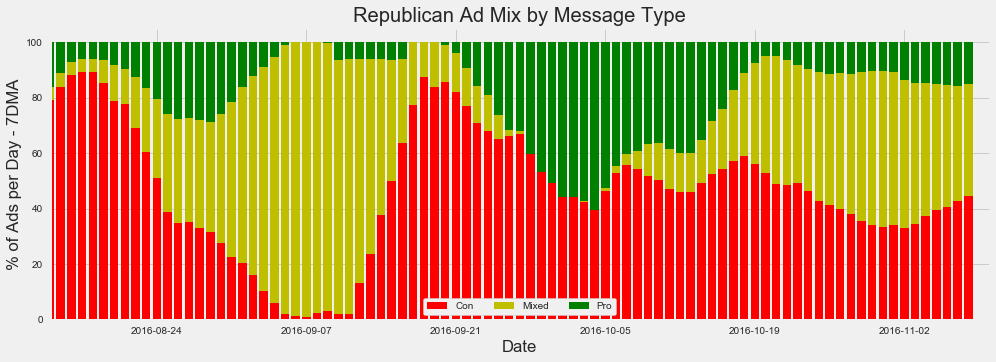

In [71]:
# Republican % Ad Mix

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(rep_7DMA.index, # all bars have to have the same start data
       rep_7DMA['rep_con_pct'].values,
       color='r', 
       label='Con')

ax.bar(rep_7DMA.index,
       rep_7DMA['rep_mixed_pct'].values,
       color='y',
       bottom=rep_7DMA['rep_con_pct'].values,
       label='Mixed')

ax.bar(rep_7DMA.index,
       rep_7DMA['rep_pro_pct'].values,
       color='g',
       bottom=rep_7DMA['rep_con_pct'].values + rep_7DMA['rep_mixed_pct'].values,
       label='Pro')

ax.set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax.legend(frameon=True, framealpha= 1, loc='lower center', ncol=4) 
# look at doc string, has the legend location codes
# framealpha=1 - makes legend solid (and brought forward), if do not put in it is transparent
ax.set(xlabel='Date', 
       ylabel='% of Ads per Day - 7DMA', 
       title='Republican Ad Mix by Message Type')

#plt.savefig('nv_revised_pics/rep_ads_by_message_type_pct.png')

In [72]:
# Summary stats for above chart

rep_7DMA[['rep_con_pct', 'rep_mixed_pct', 'rep_pro_pct']].describe()

,rep_con_pct,rep_mixed_pct,rep_pro_pct
count,87.00,87.00,87.00
mean,47.03,34.35,18.61
std,23.23,28.56,15.75
min,1.16,0.00,0.07
25%,34.69,12.64,6.37
50%,46.33,30.17,12.69
75%,59.93,49.73,27.97
max,89.20,98.77,60.58


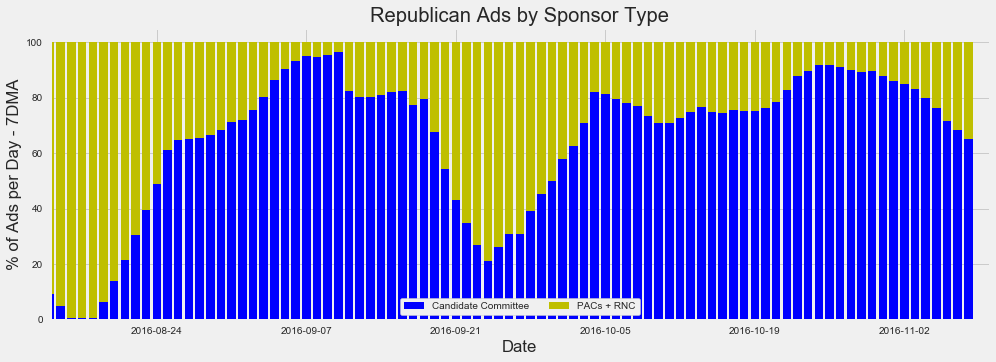

In [73]:
# Republican % Sponsor Mix

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(rep_7DMA.index, # all bars have to have the same start data
       rep_7DMA['trump_com_pct'].values,
       color='b', 
       label='Candidate Committee')

ax.bar(rep_7DMA.index,
       rep_7DMA['rep_pac_pct'].values,
       color='y',
       bottom=rep_7DMA['trump_com_pct'].values,
       label='PACs + RNC')

ax.set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax.legend(frameon=True, framealpha= 1, loc='lower center', ncol=4) 
# look at doc string, has the legend location codes
# framealpha=1 - makes legend solid (and brought forward), if do not put in it is transparent
ax.set(xlabel='Date', 
       ylabel='% of Ads per Day - 7DMA', 
       title='Republican Ads by Sponsor Type')

#plt.savefig('nv_revised_pics/rep_ads_by_sponsor_type.png')

In [74]:
# Summary stats for above chart

rep_7DMA[['trump_com_pct', 'rep_pac_pct']].describe()

,trump_com_pct,rep_pac_pct
count,87.00,87.00
mean,65.50,34.50
std,25.72,25.72
min,0.75,3.63
25%,56.11,17.83
50%,74.89,25.11
75%,82.17,43.89
max,96.37,99.25


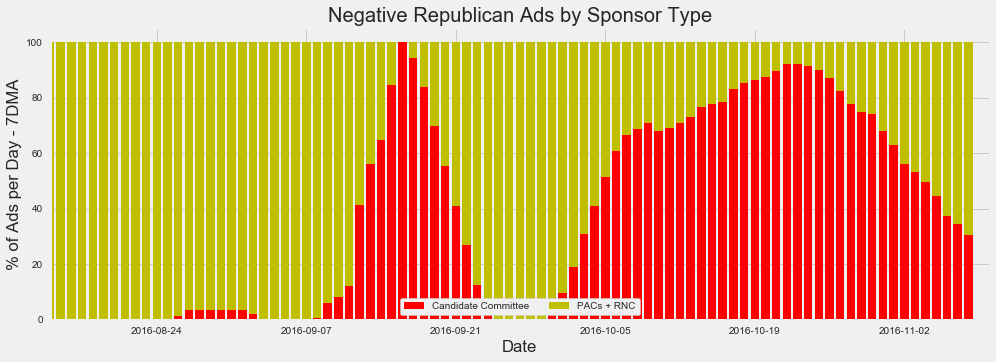

In [75]:
# Republican Negative Ads by Sponsor Type

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(rep_7DMA.index, # all bars have to have the same start data
       rep_7DMA['trump_com_neg_pct'].values,
       color='r', 
       label='Candidate Committee')

ax.bar(rep_7DMA.index,
       rep_7DMA['rep_pac_neg_pct'].values,
       color='y',
       bottom=rep_7DMA['trump_com_neg_pct'].values,
       label='PACs + RNC')

ax.set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax.legend(frameon=True, framealpha= 1, loc='lower center', ncol=4) 
# look at doc string, has the legend location codes
# framealpha=1 - makes legend solid (and brought forward), if do not put in it is transparent
ax.set(xlabel='Date', 
       ylabel='% of Ads per Day - 7DMA', 
       title='Negative Republican Ads by Sponsor Type')

#plt.savefig('nv_revised_pics/rep_neg_ads_by_sponsor_type.png')

In [76]:
rep_7DMA[['trump_com_neg_pct', 'rep_pac_neg_pct']].describe()

,trump_com_neg_pct,rep_pac_neg_pct
count,87.00,87.00
mean,38.53,61.47
std,35.77,35.77
min,0.00,0.11
25%,0.47,28.07
50%,37.44,62.56
75%,71.93,99.53
max,99.89,100.00


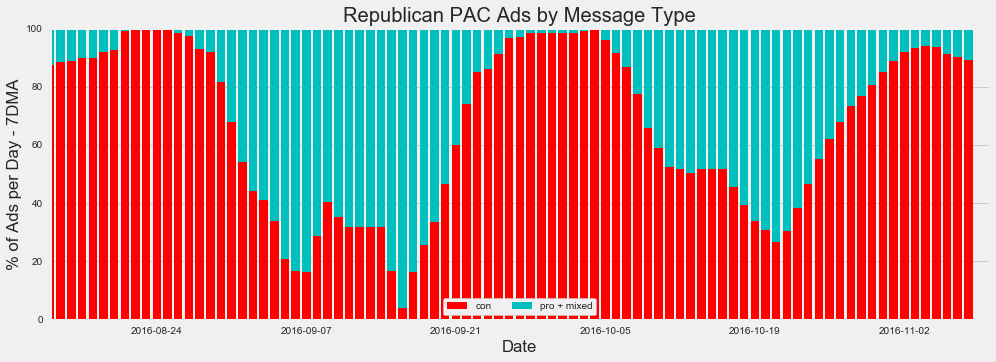

In [77]:
# Republican PAC Ads by Message

fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(rep_7DMA.index, # all bars have to have the same start data
       rep_7DMA['rep_pac_neg_mix'].values,
       color='r', 
       label='con')

ax.bar(rep_7DMA.index,
       rep_7DMA['rep_pac_other_mix'].values,
       color='c',
       bottom=rep_7DMA['rep_pac_neg_mix'].values,
       label='pro + mixed')

ax.set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax.legend(frameon=True, framealpha= 1, loc='lower center', ncol=4) 
# look at doc string, has the legend location codes
# framealpha=1 - makes legend solid (and brought forward), if do not put in it is transparent
ax.set(xlabel='Date', 
       ylabel='% of Ads per Day - 7DMA', 
       title='Republican PAC Ads by Message Type')

#plt.savefig('nv_revised_pics/rep_pac_ads_by_message_type.png')

In [78]:
rep_7DMA[['rep_pac_neg_mix', 'rep_pac_other_mix']].describe()

,rep_pac_neg_mix,rep_pac_other_mix
count,87.00,87.00
mean,67.23,32.77
std,28.43,28.43
min,4.17,0.00
25%,40.79,7.79
50%,76.72,23.28
75%,92.21,59.21
max,100.00,95.83


### Presidential Ads Aired by Party

perhaps combine time series charts versus polls??

In [79]:
# calculating the difference in total ads

demtot_minus_reptot = dem_7DMA['dem_total'].values - rep_7DMA['rep_total'].values

In [80]:
# calculating the difference in negative ads

demcon_minus_repcon = dem_7DMA['dem_con'] - rep_7DMA['rep_con']
demcon_minus_repcon.head()

start_time
2016-08-14   160.86
2016-08-15   169.71
2016-08-16   148.29
2016-08-17   112.86
2016-08-18    87.71
Freq: D, dtype: float64

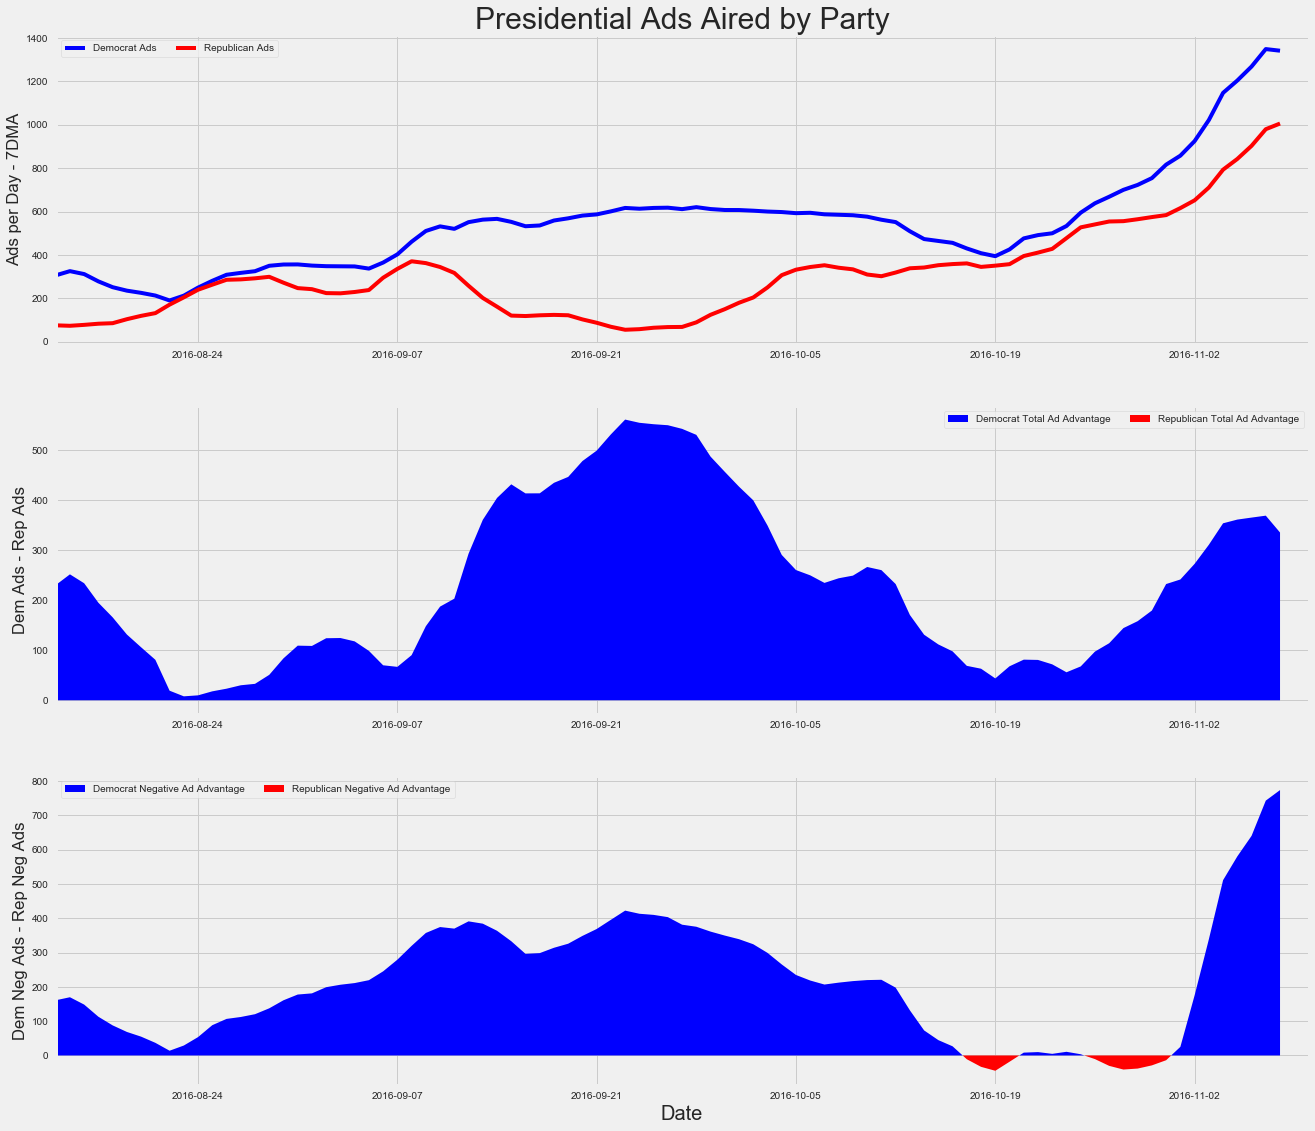

In [81]:
# Total Democrat Ads versus Republican with Total Advantage and Negative Ad Differential 

fig, ax = plt.subplots(3, figsize=(20, 18))


# Top Panel
ax[0].plot(dem_7DMA['dem_total'].index, 
           dem_7DMA['dem_total'].values, 
           'b', 
           label='Democrat Ads')

ax[0].plot(rep_7DMA['rep_total'].index, 
           rep_7DMA['rep_total'].values, 
           'r', 
           label='Republican Ads')

ax[0].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax[0].set_ylabel('Ads per Day - 7DMA')


# Middle Panel
ax[1].fill_between(dem_7DMA['dem_total'].index, 0, demtot_minus_reptot,
                   where=demtot_minus_reptot >= 0, 
                   facecolor='blue', 
                   interpolate=True,
                   label='Democrat Total Ad Advantage')

ax[1].fill_between(dem_7DMA['dem_total'].index, 0, demtot_minus_reptot, 
                   where=demtot_minus_reptot <= 0, 
                   facecolor='red', 
                   interpolate=True,
                   label='Republican Total Ad Advantage') # would have filled values where dem ads < rep ads RED

ax[1].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax[1].set_ylabel('Dem Ads - Rep Ads')

# Bottom Panel
ax[2].fill_between(dem_7DMA['dem_total'].index, 0, demcon_minus_repcon.values,
                   where=demcon_minus_repcon.values >= 0, 
                   facecolor='blue', 
                   interpolate=True,
                   label='Democrat Negative Ad Advantage')

ax[2].fill_between(dem_7DMA['dem_total'].index, 0, demcon_minus_repcon.values, 
                   where=demcon_minus_repcon.values <= 0, 
                   facecolor='red', 
                   interpolate=True,
                   label='Republican Negative Ad Advantage') # would have filled values where dem ads < rep ads RED


ax[2].set_xlim(datetime(2016, 8, 14), datetime(2016, 11, 10))
ax[2].set_ylabel('Dem Neg Ads - Rep Neg Ads')
ax[2].set_xlabel('Date', fontsize=20)

# plot legends
ax[0].legend(frameon=True, loc='best', ncol=2)
ax[1].legend(frameon=True, loc='best', ncol=2)
ax[2].legend(frameon=True, loc='upper left', ncol=2)

# plot title
ax[0].set_title('Presidential Ads Aired by Party', fontsize=30)

#plt.savefig('nv_revised_pics/pres_ads_by_party_plus_party_ad_adv.png')